In [ ]:
#Importing all the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import eli5

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.metrics import classification_report
#from pdpbox import pdp, 

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
RANDOM_SEED = 42

In [ ]:
#Loading training and test data
train_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/test.csv')

In [ ]:
cols = ['target', 'ID_code']
X = train_data.drop(cols,axis=1)
y = train_data['target']

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE 

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
X_over, y_over = undersample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_over.shape

(40196, 200)

In [ ]:
y_over.shape

(40196,)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_over,y_over, random_state = 1)

In [ ]:
pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [ ]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=5000, learning_rate=0.02, max_depth=2, loss_function='Logloss')
model.fit(x_train, y_train,eval_set=(x_val, y_val),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6925632	test: 0.6926002	best: 0.6926002 (0)	total: 77.5ms	remaining: 6m 27s
1:	learn: 0.6918556	test: 0.6919397	best: 0.6919397 (1)	total: 101ms	remaining: 4m 11s
2:	learn: 0.6912107	test: 0.6913907	best: 0.6913907 (2)	total: 124ms	remaining: 3m 26s
3:	learn: 0.6905244	test: 0.6907499	best: 0.6907499 (3)	total: 146ms	remaining: 3m 2s
4:	learn: 0.6898574	test: 0.6901334	best: 0.6901334 (4)	total: 169ms	remaining: 2m 49s
5:	learn: 0.6892225	test: 0.6895465	best: 0.6895465 (5)	total: 192ms	remaining: 2m 39s
6:	learn: 0.6885984	test: 0.6889651	best: 0.6889651 (6)	total: 214ms	remaining: 2m 32s
7:	learn: 0.6880251	test: 0.6884401	best: 0.6884401 (7)	total: 245ms	remaining: 2m 33s
8:	learn: 0.6874908	test: 0.6879395	best: 0.6879395 (8)	total: 269ms	remaining: 2m 29s
9:	learn: 0.6869184	test: 0.6873941	best: 0.6873941 (9)	total: 297ms	remaining: 2m 28s
10:	learn: 0.6863444	test: 0.6868514	best: 0.6868514 (10)	total: 322ms	remaining: 2m 25s
11:	learn: 0.6858074	test: 0.6863486	best

In [ ]:
train_predict = model.predict(x_train)

In [ ]:
train_auc = roc_auc_score(y_train,train_predict)

In [ ]:
train_auc

0.8446249319846051

In [ ]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     15045
           1       0.86      0.83      0.84     15102

    accuracy                           0.84     30147
   macro avg       0.84      0.84      0.84     30147
weighted avg       0.84      0.84      0.84     30147



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_train,model.predict_proba(x_train)[:,1])

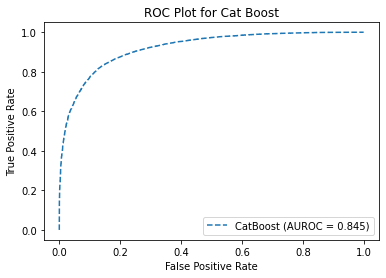

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'CatBoost (AUROC = %0.3f)' %train_auc)
plt.title('ROC Plot for Cat Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
val_predict =model.predict(x_val)

In [ ]:
val_score = roc_auc_score(y_val,val_predict)

In [ ]:
val_score

0.8060973417562469

In [ ]:
print(classification_report(y_val, val_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      5053
           1       0.81      0.80      0.80      4996

    accuracy                           0.81     10049
   macro avg       0.81      0.81      0.81     10049
weighted avg       0.81      0.81      0.81     10049



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val,model.predict_proba(x_val)[:,1])

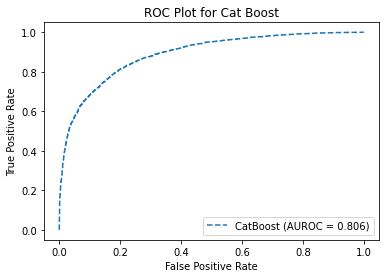

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'CatBoost (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for Cat Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
X_sm, y_sm = sm.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_sm.shape

(359804, 200)

In [ ]:
y_sm.shape

(359804,)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_sm,y_sm, random_state = 1)

In [ ]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=5000, learning_rate=0.02, max_depth=2, loss_function='Logloss')
model.fit(x_train, y_train,eval_set=(x_val, y_val),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6902145	test: 0.6902573	best: 0.6902573 (4)	total: 750ms	remaining: 12m 29s
5:	learn: 0.6896421	test: 0.6897050	best: 0.6897050 (5)	total: 889ms	remaining: 12m 19s
6:	learn: 0.6890855	test: 0.6891538	best: 0.6891538 (6)	total: 1.03s	remaining: 12m 16s
7:	learn: 0.6885123	test: 0.6885878	best: 0.6885878 (7)	total: 1.17s	remaining: 12m 10s
8:	learn: 0.6879659	test: 0.6880259	best: 0.6880259 (8)	total: 1.31s	remaining: 12m 9s
9:	learn: 0.6874208	test: 0.6874698	best: 0.6874698 (9)	total: 1.45s	remaining: 12m 4s
10:	learn: 0.6868738	test: 0.6869374	best: 0.6869374 (10)	total: 1.6s	remaining: 12m 7s
11:	learn: 0.6863449	test: 0.6864108	best: 0.6864108 (11)	total: 1.75s	remaining: 12m 8s
12:	learn: 0.6858128	test: 0.6858730	best: 0.6858730 (12)	total: 1.9s	remaining: 12m 8s
13:	learn: 0.6852834	test: 0.6853595	best: 0.6853595 (13)	total: 2.04s	remaining: 12m 5s
14:	learn: 0.6847687	test: 0.6848611	best: 0.6848611 (14)	total: 2.18

In [ ]:
train_predict = model.predict(x_train)

In [ ]:
train_auc = roc_auc_score(y_train,train_predict)

In [ ]:
train_auc

0.8833324959607836

In [ ]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    134970
           1       0.90      0.86      0.88    134883

    accuracy                           0.88    269853
   macro avg       0.88      0.88      0.88    269853
weighted avg       0.88      0.88      0.88    269853



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_train,model.predict_proba(x_train)[:,1])

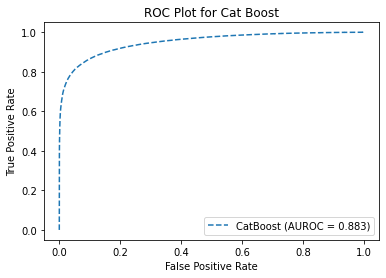

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'CatBoost (AUROC = %0.3f)' %train_auc)
plt.title('ROC Plot for Cat Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:

val_predict =model.predict(x_val)

In [ ]:
val_score = roc_auc_score(y_val,val_predict)

In [ ]:
val_score

0.8773004921270993

In [ ]:
print(classification_report(y_val, val_predict))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     44932
           1       0.90      0.85      0.87     45019

    accuracy                           0.88     89951
   macro avg       0.88      0.88      0.88     89951
weighted avg       0.88      0.88      0.88     89951



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val,model.predict_proba(x_val)[:,1])

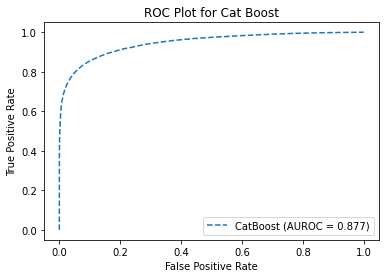

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'CatBoost (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for Cat Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))